In [4]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pylab as pl

import seaborn as sns


In [5]:
df=pd.read_csv("/home/tiredninja/Documents/project1.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [6]:
df=df.rename({"Price(USD)":"PriceUSD"}, axis='columns')

In [7]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [8]:
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data
data=mapping(df,"Area")
data=mapping(df,"PriceUSD")

In [9]:
df = df.drop(df[40>df.Area].index)
df = df.drop(df[150<df.Area].index)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
0,46,1,True,True,True,Shahran,1.850000e+09,616
1,50,1,True,True,True,Shahran,1.850000e+09,616
7,51,1,True,True,True,Shahran,2.150000e+09,574
8,58,2,True,True,False,Andisheh,4.930000e+08,864
11,44,1,True,True,True,Narmak,2.100000e+09,581


In [10]:
df.drop(df[(df['PriceUSD'] >=296333.33)].index, inplace=True)


In [11]:
df["PriceUSD"]=(df["PriceUSD"]-df["PriceUSD"].min())/(df["PriceUSD"].max()-df["PriceUSD"].min())
df["Room"]=(df["Room"]-df["Room"].min())/(df["Room"].max()-df["Room"].min())
df["Area"]=(df["Area"]-df["Area"].min())/(df["Area"].max()-df["Area"].min())

df["PriceUSD"].value_counts()

df.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
0,0.054545,0.2,True,True,True,Shahran,1.850000e+09,0.664509
1,0.090909,0.2,True,True,True,Shahran,1.850000e+09,0.664509
7,0.100000,0.2,True,True,True,Shahran,2.150000e+09,0.619202
8,0.163636,0.4,True,True,False,Andisheh,4.930000e+08,0.932039
11,0.036364,0.2,True,True,True,Narmak,2.100000e+09,0.626753


In [12]:
df.shape


(1029, 8)

In [13]:
df=df.drop(["Address"],axis=1)

<AxesSubplot:>

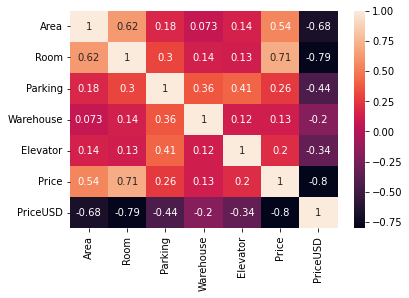

In [14]:
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True)

In [15]:
df.dtypes
df.nunique()
df.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Price        0
PriceUSD     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 3473
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       1029 non-null   float64
 1   Room       1029 non-null   float64
 2   Parking    1029 non-null   bool   
 3   Warehouse  1029 non-null   bool   
 4   Elevator   1029 non-null   bool   
 5   Price      1029 non-null   float64
 6   PriceUSD   1029 non-null   float64
dtypes: bool(3), float64(4)
memory usage: 75.5 KB


In [17]:
df["PriceUSD"].value_counts()

0.639698    22
0.611650    19
0.773463    18
0.653722    16
0.664509    15
            ..
0.088457     1
0.744337     1
0.000000     1
0.021575     1
0.975189     1
Name: PriceUSD, Length: 410, dtype: int64

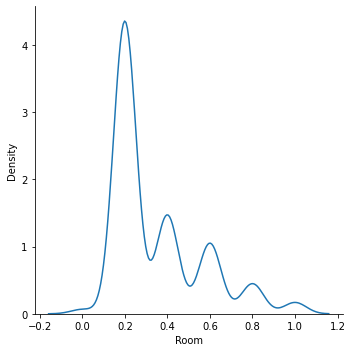

In [18]:
sns.displot(df, x="Room", kind="kde")

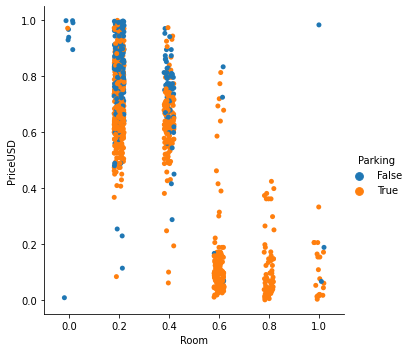

In [19]:
sns.catplot( x="Room",y="PriceUSD",hue="Parking",data=df)


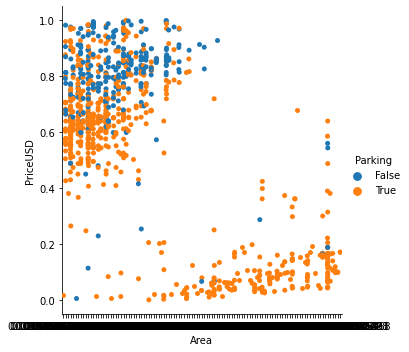

In [20]:
sns.catplot( x="Area",y="PriceUSD",hue="Parking",data=df)


In [21]:
df = df.drop(df[0==df.Room].index)
df["PriceUSD"].value_counts()
df["Room"].value_counts()



0.2    593
0.4    200
0.6    143
0.8     61
1.0     23
Name: Room, dtype: int64

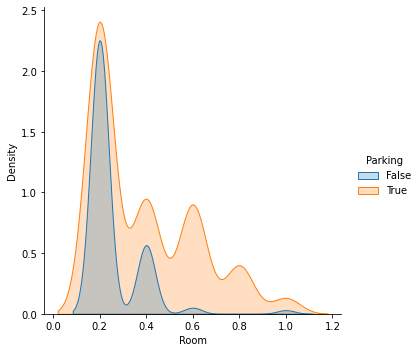

In [22]:
sns.displot(df, x="Room",hue='Parking',kind="kde", fill="True")

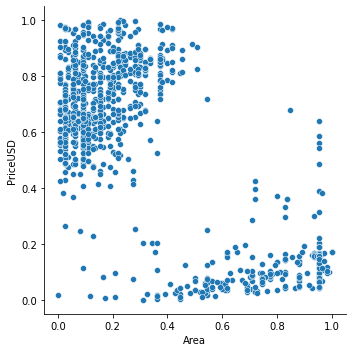

In [23]:
sns.relplot(x="Area", y="PriceUSD", data=df)

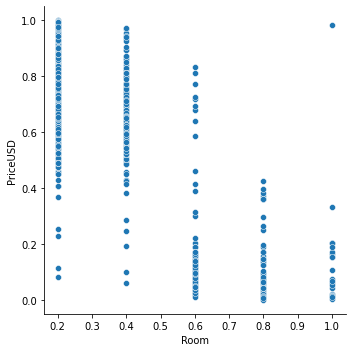

In [24]:
sns.relplot(x="Room", y="PriceUSD", data=df)

<AxesSubplot:>

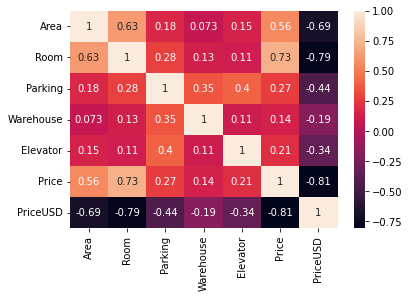

In [25]:
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True)

<AxesSubplot:xlabel='Area', ylabel='PriceUSD'>

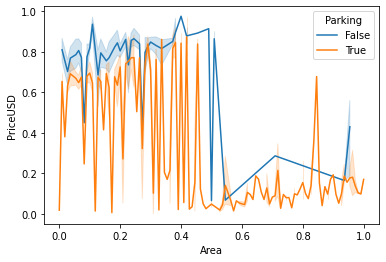

In [27]:
sns.lineplot(x="Area", y="PriceUSD",
             hue="Parking",data=df)

In [28]:

df["PriceUSD"].value_counts()



0.639698    22
0.611650    19
0.773463    18
0.653722    16
0.664509    15
            ..
0.744337     1
0.000000     1
0.021575     1
0.133765     1
0.975189     1
Name: PriceUSD, Length: 407, dtype: int64

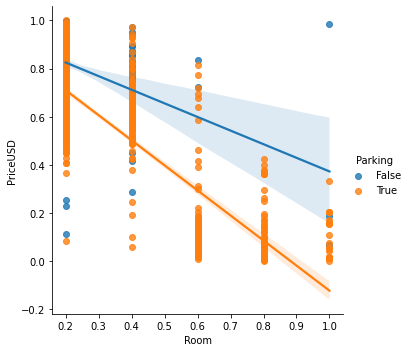

In [29]:
sns.lmplot(x="Room", y="PriceUSD",hue="Parking", data=df);


In [30]:
cdf = df[["PriceUSD","Area","Parking","Room"]]
cdf.head(9)

,PriceUSD,Area,Parking,Room
0,0.664509,0.054545,True,0.2
1,0.664509,0.090909,True,0.2
7,0.619202,0.100000,True,0.2
8,0.932039,0.163636,True,0.4
11,0.626753,0.036364,True,0.2
12,0.689320,0.163636,False,0.2
15,0.912621,0.054545,False,0.2
17,0.724919,0.036364,False,0.4
19,0.735707,0.318182,False,0.2


In [31]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

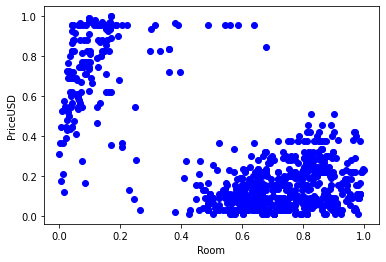

In [32]:
plt.scatter(train.PriceUSD, train.Area,  color='blue')
plt.xlabel("Room")
plt.ylabel("PriceUSD")
plt.show()

In [33]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Room']])
train_y = np.asanyarray(train[['PriceUSD']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-1.10216763]]
Intercept:  [0.97762076]


In [34]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Room']])
test_y = np.asanyarray(test[['PriceUSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.15
Residual sum of squares (MSE): 0.03
R2-score: 0.60


In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Room','Area']])
train_y = np.asanyarray(train[['PriceUSD']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.79782396 -0.33650081]]
Intercept:  [0.96683834]


In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Room','Area']])
test_y = np.asanyarray(test[['PriceUSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.13
Residual sum of squares (MSE): 0.03
R2-score: 0.65
